In [13]:
import monai
import torch
import numpy as np
from monai.apps import DecathlonDataset, download_and_extract
from monai.data import DataLoader, Dataset
from monai.transforms import (
    EnsureChannelFirstd, ## tesor로 변경하기 위해 channel로 옮김
    LoadImaged, ## nifiti, dicom image 읽어오기
    Spacingd, ## 이미지의 pixel간의 spacing을 interpolationd을 쉽게 해줌
    Orientationd, ## 이미지의 위치를 다시 정렬  Left (L), Right (R), Posterior (P), Anterior (A), Inferior (I), Superior (S).
    ScaleIntensityRanged, # min, max범위를 and scales to (0, 1) 하는 방법 
    Compose,  ## 해당 augmentationd을 list로 묶어서 사용
    OneOf, ## 여러 Augmenation중에 하나를 선택하기
    CropForegroundd, ## Foreground부분만 남기는 방법
    Rand3DElasticd, ## 3D 모양으로 Elastic Transform 
    RandAffined, ## 이미지의 크기는고정인 상태로 augmenation 함수
    RandRotated, ## random roatate
    RandFlipd, 
    
)
from monai.visualize.utils import (
    blend_images,## label과 Image를 합친 영상
    matshow3d ## 3d image의 visulization 
)

In [5]:
image = ["/mnt/4TB1/onj/dataset/v0/ONJ/EW-0003/MDCT/20191212/MDCT_axial/nifti/2_facial__10__h70h_axl.nii.gz"]
data_dicts = [
    {"image": image},
]

In [11]:

dataset = monai.data.Dataset(data=data_dicts, transform=monai.transforms.LoadImaged(keys=["image"]))

In [12]:
dataset[0]["image"].shape

torch.Size([512, 512, 184])

In [10]:
dataset[0]["image"].pixdim



tensor([0.3906, 0.3906, 1.0000], dtype=torch.float64)

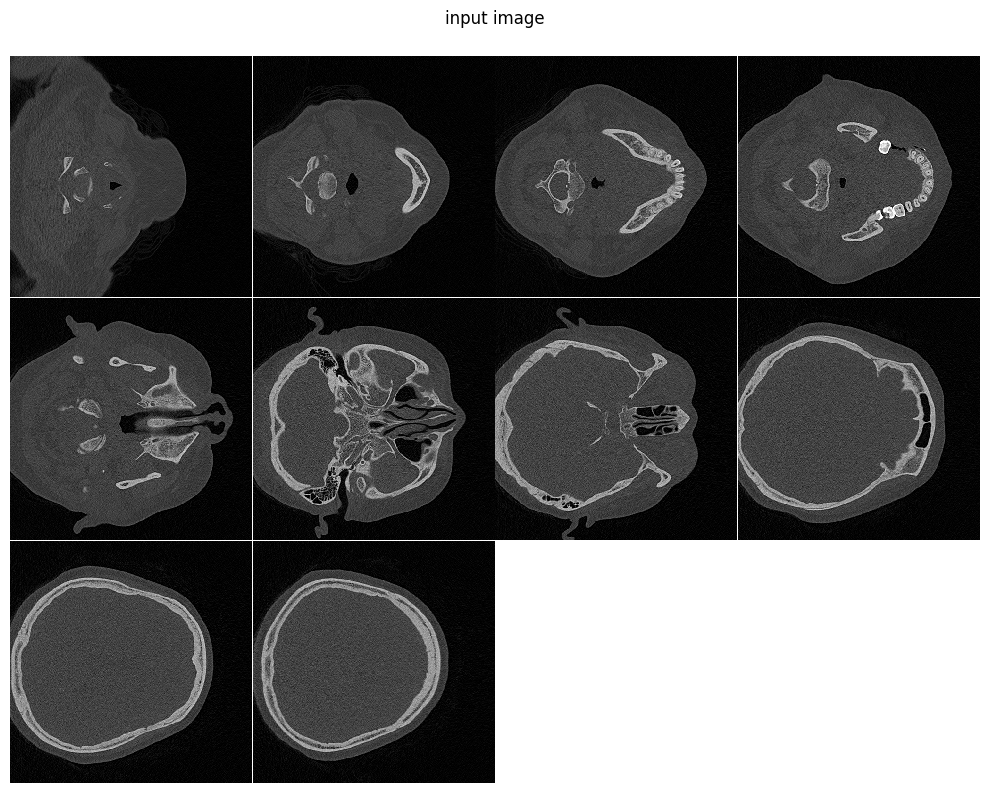

In [14]:
plt = matshow3d(
    volume=dataset[0]["image"][...,1::20],
    fig=None,
    title="input image",
    frame_dim=-1,
    show=True,
    cmap="gray",
)

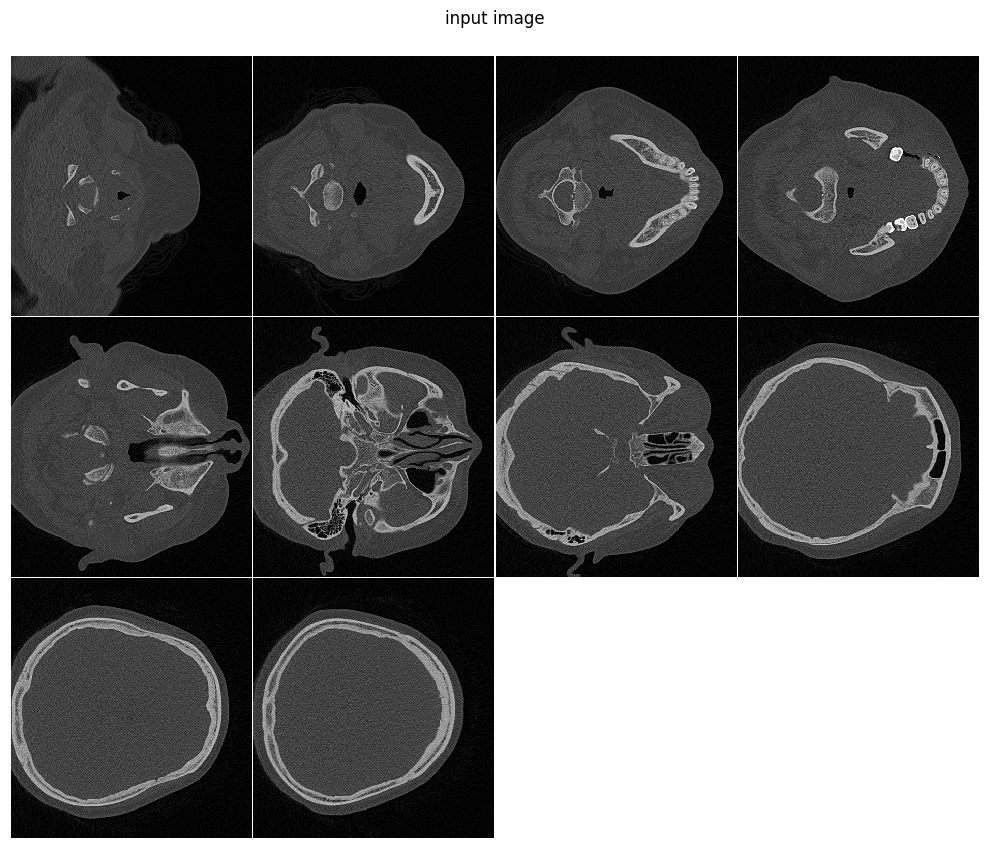

In [19]:
transform = Compose(
    [
        LoadImaged(keys=["image"]),
        EnsureChannelFirstd(keys=["image"]),
        CropForegroundd(keys=["image"], source_key="image"),
#         NormalizeIntensityd(keys=["image"])
    ])

dataset = Dataset(data=data_dicts, transform=transform)
plt = matshow3d(
    volume=dataset[0]["image"][...,1::20],
    fig=None,
    title="input image",
    frame_dim=-1,
    show=True,
    cmap="gray",
)


In [ ]:
# dataset, dataloader done